## Implementation and Visualization of Different Regression Methods

Using the ames housing dataset from kaggle

__Ridge Regression__

In [1]:
# import implemented regression baselines
from code.models import RidgeRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

config = {"path": "data",
          "seed": 42,
          "n_folds": 10,
          "cv_metric": "root_mean_squared_log_error",
         }

model = RidgeRegression(config)
means = []
stds = []
alphas = [0.1, 1, 10, 100, 1000]
for alpha in alphas:
    model.cross_validate(alpha=alpha)
    mean = np.mean(model.m_cv_scores)
    std = np.std(model.m_cv_scores)
    means.append(mean)
    stds.append(std)

Loading Data ...


ValueError: Input contains NaN

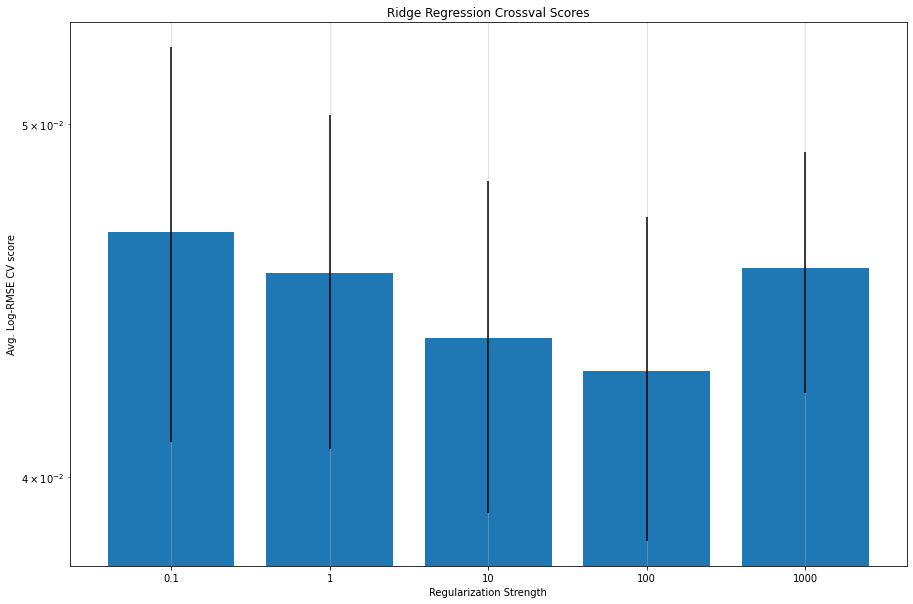

In [2]:
x = np.arange(len(alphas))
plt.figure(figsize=(15,10))
plt.bar(x, means, yerr=stds)
plt.title("Ridge Regression Crossval Scores")
plt.xticks(x, alphas)
plt.yscale("log")
plt.xlabel("Regularization Strength")
plt.ylabel("Avg. Log-RMSE CV score")
plt.grid(alpha=0.5)
plt.show()

In [3]:
X = model.m_X.copy()
y = model.m_y

X_test = pd.read_csv("data/test.csv")
X_test = model.impute_and_encode(X_test)

model.standardize(X, X_test)

model.train(X, y)
y_test = model.predict(X_test)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 288 is different from 270)